# Original CapsNet Model Train

In this notebook we provide a simple interface to train the original CapsNet model described in "Dynamic routinig between capsules". The model is copycat of the original Sara's repository (https://github.com/Sarasra/models/tree/master/research/capsules). <br>
However, if you really reach 99.75, you've got to buy me a drink :)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import CapsNet
import matplotlib.pyplot as plt

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [4]:
# some parameters
model_name = 'MNIST' #- MNIST (AD dataset with MHD files)
n_routing = 3

# 1.0 Import the Dataset

In [5]:
dataset = Dataset(model_name, config_path='config.json') # MHD

(378, 128, 128)
(378,)
(50, 128, 128)
(50,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1.]
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

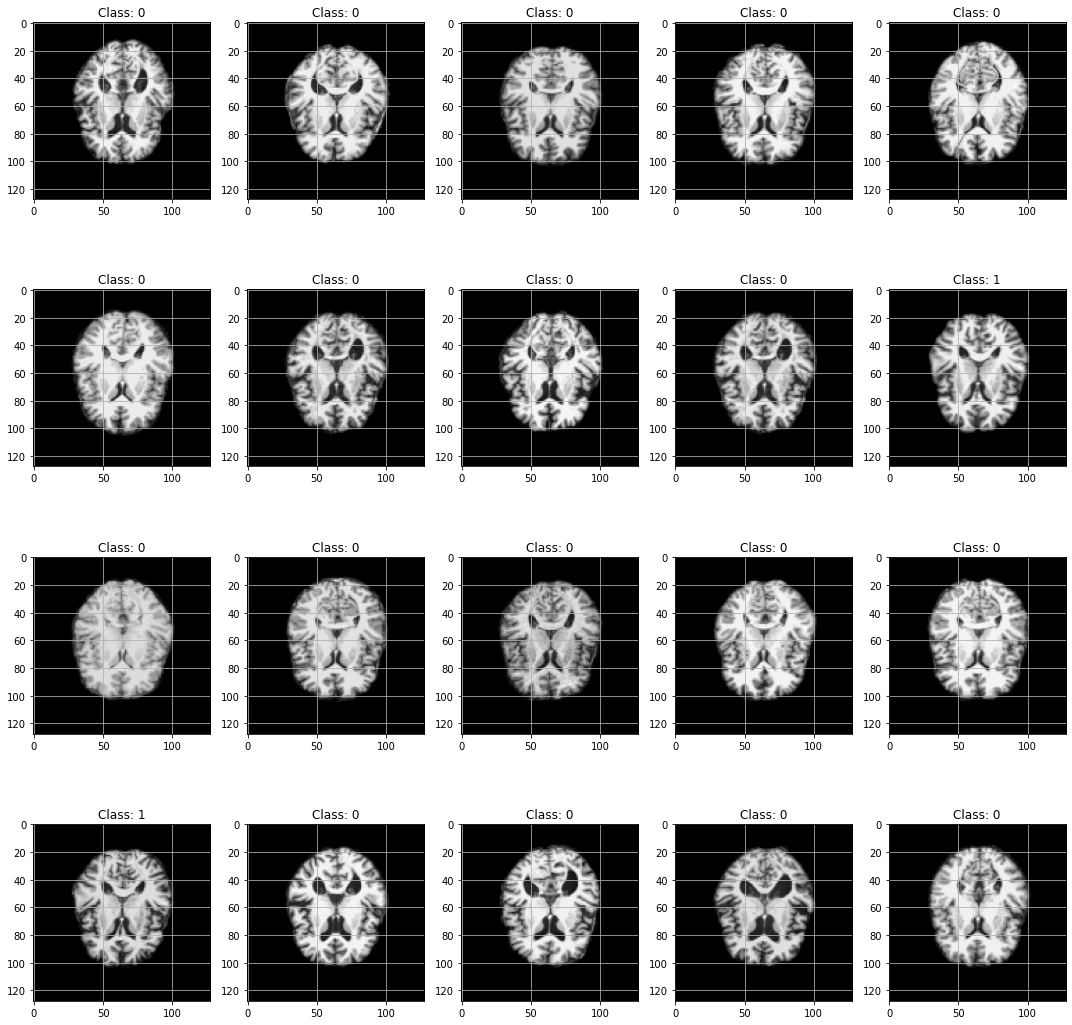

In [6]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
dataset_train, dataset_val = dataset.get_tf_data()
model_train = CapsNet(model_name, mode='train', verbose=True, n_routing=n_routing)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Model: "Original_CapsNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 120, 120, 256 20992       input_4[0][0]                    
__________________________________________________________________________________________________
primary_caps (PrimaryCaps)      (None, 56, 56, 32, 8 5308672     conv2d[0][0]                     
__________________________________________________________________________________________________
digit_caps (DigitCaps)          (None, 2, 16

# 3.0 Train the Model

In [8]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------MNIST train------------------------------
Epoch 1/150
24/24 [==============================] - 18s 308ms/step - loss: 0.9070 - Original_CapsNet_loss: 0.8094 - Generator_loss: 0.2489 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.9066 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 0.2479 - val_Original_CapsNet_accuracy: 0.7600
Epoch 2/150
24/24 [==============================] - 6s 252ms/step - loss: 0.9060 - Original_CapsNet_loss: 0.8094 - Generator_loss: 0.2463 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.9047 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 0.2430 - val_Original_CapsNet_accuracy: 0.7600
Epoch 3/150
24/24 [==============================] - 6s 251ms/step - loss: 0.9001 - Original_CapsNet_loss: 0.8094 - Generator_loss: 0.2313 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8897 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 0.2049 - val_Original_CapsNet_accuracy: 0.7600
Epoch 4/150
24/24 [===========

24/24 [==============================] - 6s 252ms/step - loss: 0.8095 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.1120e-04 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8095 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.0551e-04 - val_Original_CapsNet_accuracy: 0.7600
Epoch 22/150
24/24 [==============================] - 6s 250ms/step - loss: 0.8095 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.0205e-04 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8095 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 9.6971e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 23/150
24/24 [==============================] - 6s 252ms/step - loss: 0.8095 - Original_CapsNet_loss: 0.8094 - Generator_loss: 9.3932e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8095 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 8.9475e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 24/150
24/24 [==============================] - 6s 252ms/step - loss: 0.8095 - Orig

24/24 [==============================] - 6s 251ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 3.3783e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 3.2711e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 42/150
24/24 [==============================] - 6s 252ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 3.2425e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 3.1405e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 43/150
24/24 [==============================] - 6s 253ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 3.1201e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 3.0198e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 44/150
24/24 [==============================] - 6s 252ms/step - loss: 0.8094 - Orig

24/24 [==============================] - 6s 262ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.7526e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.7044e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 62/150
24/24 [==============================] - 6s 258ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.7087e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.6610e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 63/150
24/24 [==============================] - 6s 261ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.6635e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.6191e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 64/150
24/24 [==============================] - 6s 257ms/step - loss: 0.8094 - Orig

24/24 [==============================] - 6s 258ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.1252e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.0944e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 82/150
24/24 [==============================] - 6s 257ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.1028e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.0740e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 83/150
24/24 [==============================] - 6s 265ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 1.0843e-05 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 1.0535e-05 - val_Original_CapsNet_accuracy: 0.7600
Epoch 84/150
24/24 [==============================] - 6s 258ms/step - loss: 0.8094 - Orig

24/24 [==============================] - 6s 254ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 8.0857e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 7.8641e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 102/150
24/24 [==============================] - 6s 254ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 7.9762e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 7.7544e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 103/150
24/24 [==============================] - 6s 255ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 7.8559e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 7.6435e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 104/150
24/24 [==============================] - 6s 254ms/step - loss: 0.8094 - O

24/24 [==============================] - 6s 253ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 6.2421e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 6.0680e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 122/150
24/24 [==============================] - 6s 254ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 6.1737e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 6.0003e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 123/150
24/24 [==============================] - 6s 253ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 6.1064e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 5.9296e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 124/150
24/24 [==============================] - 6s 254ms/step - loss: 0.8094 - O

24/24 [==============================] - 6s 253ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 5.0542e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 4.9129e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 142/150
24/24 [==============================] - 6s 252ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 5.0111e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 4.8675e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 143/150
24/24 [==============================] - 6s 257ms/step - loss: 0.8094 - Original_CapsNet_loss: 0.8094 - Generator_loss: 4.9626e-06 - Original_CapsNet_accuracy: 0.7593 - val_loss: 0.8094 - val_Original_CapsNet_loss: 0.8094 - val_Generator_loss: 4.8197e-06 - val_Original_CapsNet_accuracy: 0.7600
Epoch 144/150
24/24 [==============================] - 6s 253ms/step - loss: 0.8094 - O

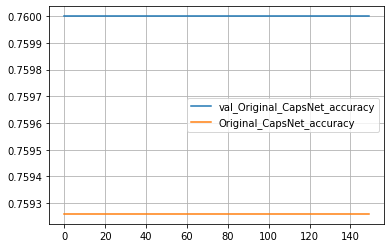

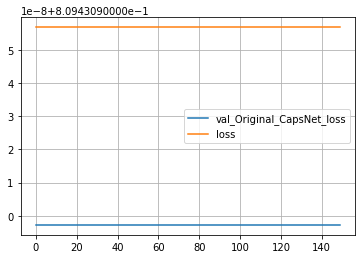

In [9]:
def plot_history(history):
    plt.plot(history.history['val_Original_CapsNet_accuracy'])
    plt.plot(history.history['Original_CapsNet_accuracy'])

    plt.legend(['val_Original_CapsNet_accuracy','Original_CapsNet_accuracy'])
    plt.grid(True)
    plt.show()


    plt.plot(history.history['val_Original_CapsNet_loss'])
    plt.plot(history.history['Original_CapsNet_loss'])

    plt.legend(['val_Original_CapsNet_loss','loss'])
    plt.grid(True)
    plt.show()
plot_history(history)